# Forecasts & Predictions


## Project description
    
    The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
    One of the most common problems gyms and other services face is customer churn. How do we know if a customer is no longer with you? We can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
    Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, we can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: our follower might have gotten bored and left us.
    For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
    In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.


    File path:  /datasets/gym_churn_us.csv

### Project plan
1. [Prepare the Data](#introduction)
2. [Analyze Data](#introduction1)
3. [Forecasts & Predictions](#introduction2)
4. [General conclusion](#introduction3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Prepare the Data <a name="introduction"></a>

In [4]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

There are not null values in the data.

In [5]:
print (data.duplicated().sum()/data.shape[0])


0.0


There are not duplictes in the data.

In [6]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In our data we have:
- the same number of people of both genders;
- the mean age of people is 29;
- the mean contract period about 4.5 month;
- the mean life time of users about 3.7 month.

### Conlusion:

- There are not null values in the data.
- There are not duplictes in the data.
  
  In our data we have:
- the same number of people of both genders;
- the mean age of people is 29;
- the mean contract period about 4.5 month;
- the mean life time of users about 3.7 month.

## Analyze Data <a name="introduction1"></a>

In [7]:
data.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


People who don't have churn: 
- are twice as likely to participate in group classes;
- more often spent money on other gym services;
- have more monthes remaining until the contract expires (it shows people's confidence in future visits to the gym);
- have more visits per week over the preceding month.

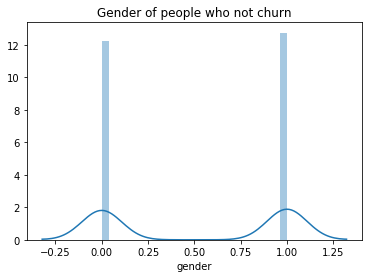

In [8]:
sns.distplot(data[data['Churn'] == 0]['gender'],bins = 25);
plt.title('Gender of people who not churn')
plt.show()

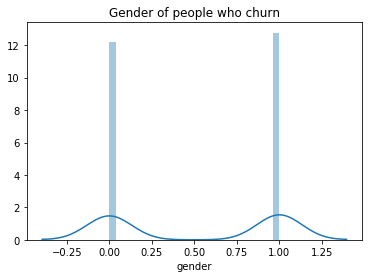

In [9]:
sns.distplot(data[data['Churn'] == 1]['gender'],bins = 25);
plt.title('Gender of people who churn')
plt.show()

There is no difference in the gender division of people

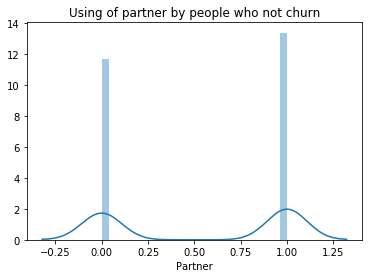

In [10]:
sns.distplot(data[data['Churn'] == 0]['Partner'],bins = 25);
plt.title('Using of partner by people who not churn')
plt.show()

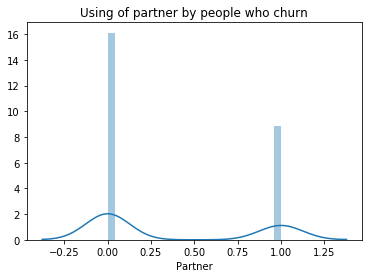

In [11]:
sns.distplot(data[data['Churn'] == 1]['Partner'],bins = 25);
plt.title('Using of partner by people who churn')
plt.show()

People from the churn were less likely to use the partner

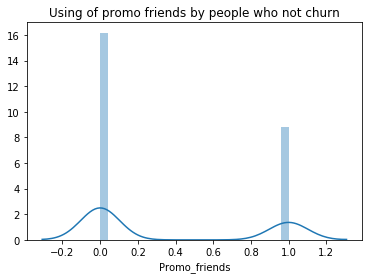

In [12]:
sns.distplot(data[data['Churn'] == 0]['Promo_friends'],bins = 25);
plt.title('Using of promo friends by people who not churn')
plt.show()

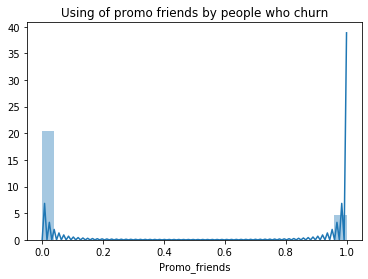

In [13]:
sns.distplot(data[data['Churn'] == 1]['Promo_friends'],bins = 25);
plt.title('Using of promo friends by people who churn')
plt.show()

People from the churn were more likely to use the promo friends.

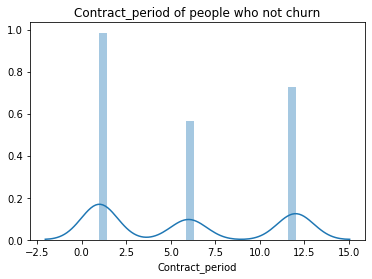

In [14]:
sns.distplot(data[data['Churn'] == 0]['Contract_period'],bins = 25);
plt.title('Contract_period of people who not churn')
plt.show()

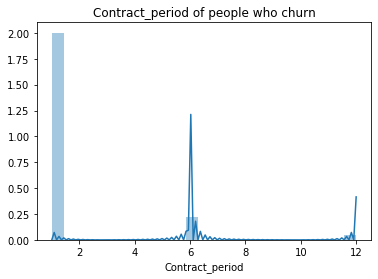

In [15]:
sns.distplot(data[data['Churn'] == 1]['Contract_period'],bins = 25);
plt.title('Contract_period of people who churn')
plt.show()

People who churn have a small contract period.

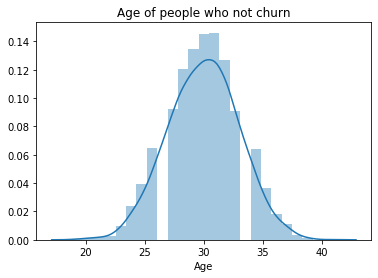

In [16]:
sns.distplot(data[data['Churn'] == 0]['Age'],bins = 25);
plt.title('Age of people who not churn')
plt.show()

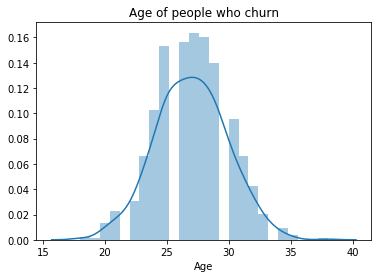

In [17]:
sns.distplot(data[data['Churn'] == 1]['Age'],bins = 25);
plt.title('Age of people who churn')
plt.show()

People who churn on average yunger than People who not churn.

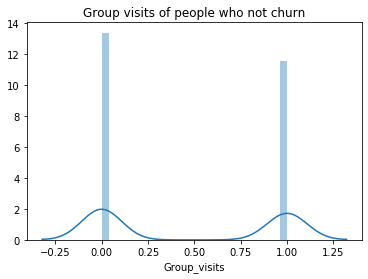

In [18]:
sns.distplot(data[data['Churn'] == 0]['Group_visits'],bins = 25);
plt.title('Group visits of people who not churn')
plt.show()

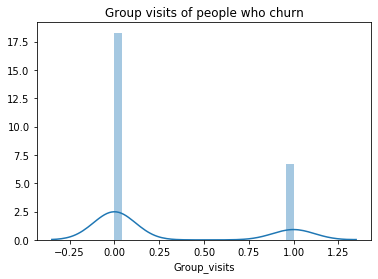

In [19]:
sns.distplot(data[data['Churn'] == 1]['Group_visits'],bins = 25);
plt.title('Group visits of people who churn')
plt.show()

People from the churn are less likely to attend group classes.

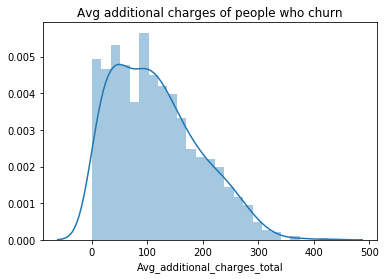

In [20]:
sns.distplot(data[data['Churn'] == 1]['Avg_additional_charges_total'],bins = 25);
plt.title('Avg additional charges of people who churn')
plt.show()

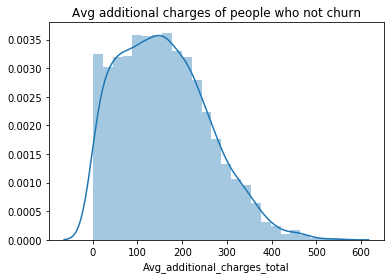

In [21]:
sns.distplot(data[data['Churn'] == 0]['Avg_additional_charges_total'],bins = 25);
plt.title('Avg additional charges of people who not churn')
plt.show()

People who don't have churn more often spent money on other gym services

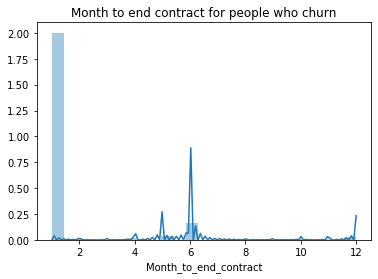

In [22]:
sns.distplot(data[data['Churn'] == 1]['Month_to_end_contract'],bins = 25);
plt.title('Month to end contract for people who churn')
plt.show()

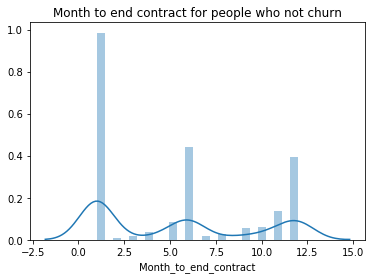

In [23]:
sns.distplot(data[data['Churn'] == 0]['Month_to_end_contract'],bins = 25);
plt.title('Month to end contract for people who not churn')
plt.show()

People who don't have churn have more monthes remaining until the contract expires (it shows people's confidence in future visits to the gym);


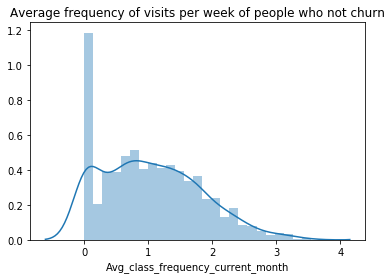

In [24]:
sns.distplot(data[data['Churn'] == 1]['Avg_class_frequency_current_month'],bins = 25);
plt.title('Average frequency of visits per week of people who not churn')
plt.show()

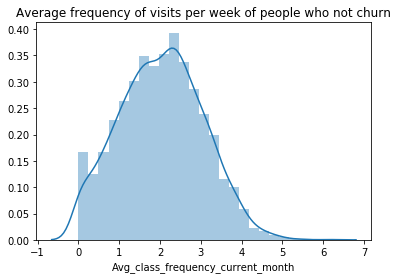

In [25]:
sns.distplot(data[data['Churn'] == 0]['Avg_class_frequency_current_month'],bins = 25);
plt.title('Average frequency of visits per week of people who not churn')
plt.show()

People who don't have churn have more visits per week over the preceding month.

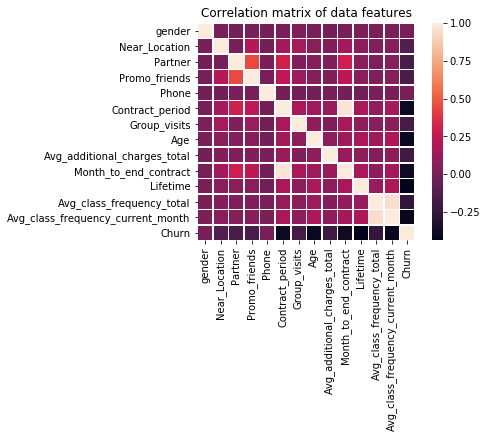

In [26]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, 
            square=True, linewidths=.5)
plt.title('Correlation matrix of data features')
plt.show()

In [27]:
corr_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


We have a great correlation between:
- Avg_class_frequency_total and Avg_class_frequency_current_month, to avoid its domination over other variables during training stage

In [28]:
del data['Avg_class_frequency_current_month']


### Conlusion:

    
    People who don't have churn: 
- are twice as likely to participate in group classes;
- more often spent money on other gym services;
- have more monthes remaining until the contract expires (it shows people's confidence in future visits to the gym);
- have more visits per week over the preceding month.

- People from the churn were less likely to use the partner.
- People from the churn were more likely to use the promo friends.
- People who churn have a small contract period.

- People who churn on average yunger than People who not churn.

    We have a great correlation between:
- Promo_friends and Partner - people who have patrner with gym come through promo;
- Partner and Contract_period - people who have patrner have the same contract period.
    


## Forecasts & Predictions <a name="introduction2"></a>


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

<div class="alert alert-warning">

**Reviewer's comment**

We can add stratify=y inside train_test_split function, where y is our target variable. As a result, the dataset will be devided into two clusters. The first one will contain all the observations of class 0, while the second one – all the observations of class 1. Then, 20% of observations from each cluster will be combined into test set:
    
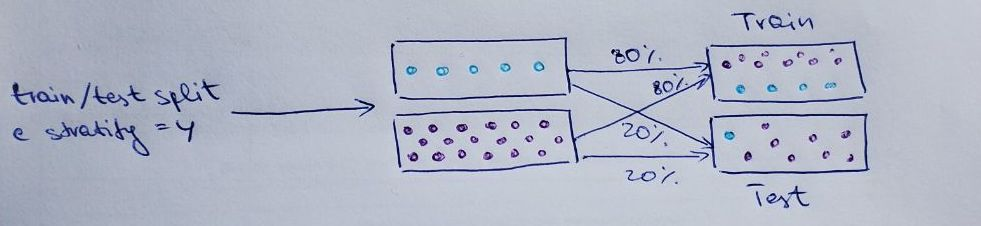
    
This approach helps to split the data into train and test sets in a way that preserves the proportions of observations in each class as observed in the original dataset. It is important as our classes are imbalanced.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0, stratify= y ) 


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = model.predict(X_test) 

In [34]:

from sklearn.ensemble import RandomForestClassifier


model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred2 = model2.predict(X_test) 

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy =", round(accuracy_score(y_test, y_pred), 4)) 

Accuracy = 0.9038


In [37]:
data['Churn'].value_counts(normalize = True)

0    0.73475
1    0.26525
Name: Churn, dtype: float64

In [38]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Presicion =", round(precision, 4))
print("Recall =", round(recall, 4))

Presicion = 0.8261
Recall = 0.8066


Even a basic model like Logistic Regression makes very accurate predictions. 

In [39]:
print("Accuracy =", round(accuracy_score(y_test, y_pred2), 4)) 
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
print("Presicion =", round(precision, 4))
print("Recall =", round(recall, 4))

Accuracy = 0.8775
Presicion = 0.8098
Recall = 0.7028


Model Random Forest Classifier makes more accurate predictions than Logistic Regression.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_sc = scaler.fit_transform(X)

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage 
linked = linkage(X_sc, method = 'ward') 

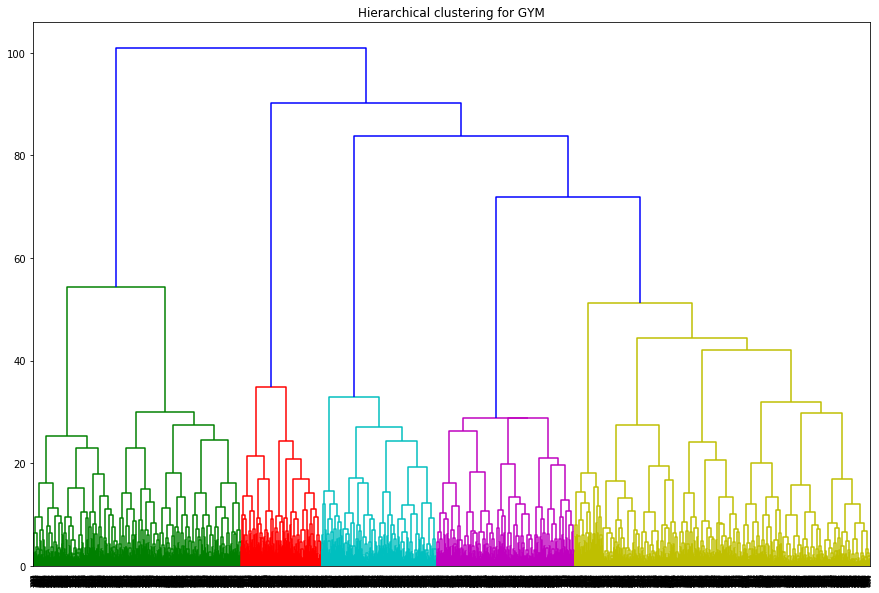

In [42]:
plt.figure(figsize=(15, 10))  
plt.title('Hierarchical clustering for GYM')
dendrogram(linked, orientation='top')
plt.show()

Optimal number of clusters (5) corresponds to the four different colors on the plot, but purple the bigest one, so for good proportion i divide it for two clusters.

In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc) 

In [44]:
data['cluster_km'] = labels
data1= data.groupby(['cluster_km']).mean()

In [48]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,0,1


Conclusions about clusters :
- people from clusters 0 have a partner;
- 79% of people from cluster 2 used Promo friends;
- people from cluster 0 have the greatest contract period - about for one year;
- people from cluster 2 less using group visits;
- people from cluster 4 more spending time in a gym;
- clusters 0 and 4 have greatest lifetime.
- clusters 0 and 4 have less customer churn.


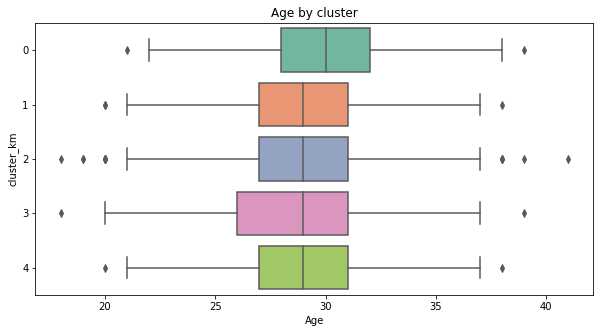

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data,x ="Age", orient="h", y="cluster_km", palette="Set2")
plt.title('Age by cluster')
plt.show() 

All clusters do not differ in age.

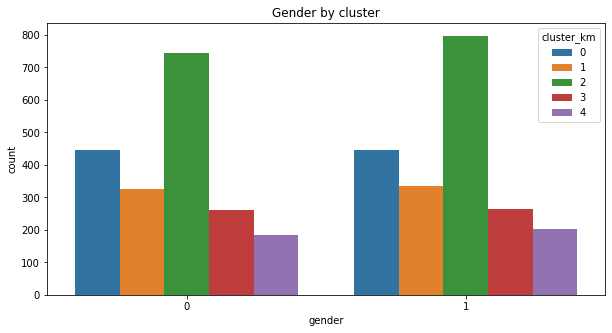

In [49]:
plt.figure(figsize=(10, 5))
plt.title('Gender by cluster')
sns.countplot(x="gender", hue="cluster_km", data=data)
plt.show() 

All clusters do not differ in gender.

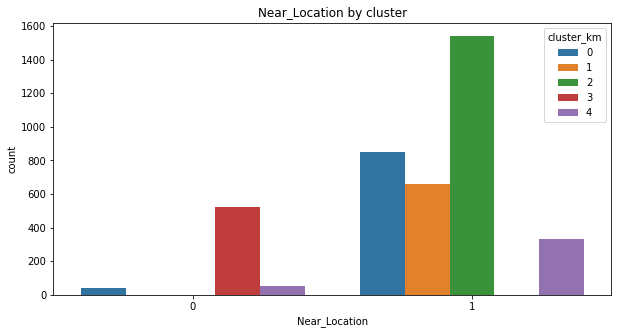

In [56]:

plt.figure(figsize=(10, 5))
plt.title('Near_Location by cluster')
sns.countplot(x="Near_Location", hue="cluster_km", data=data)
plt.show() 

Cluster 3 is not near the gym.
Cluster 1 has the most convenient location relative to the gym.


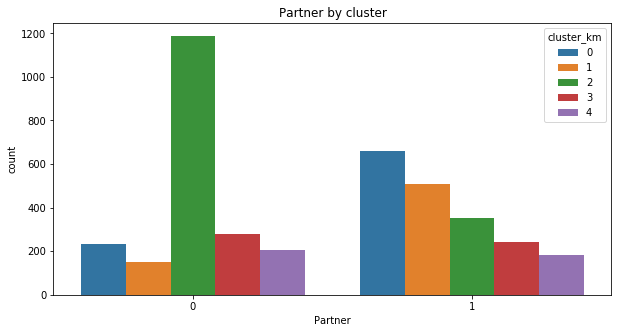

In [57]:

plt.figure(figsize=(10, 5))
plt.title('Partner by cluster')
sns.countplot(x="Partner", hue="cluster_km", data=data)
plt.show() 

People from clusters 0 have more partner than other.
People from clusters 2 have less partner than other.


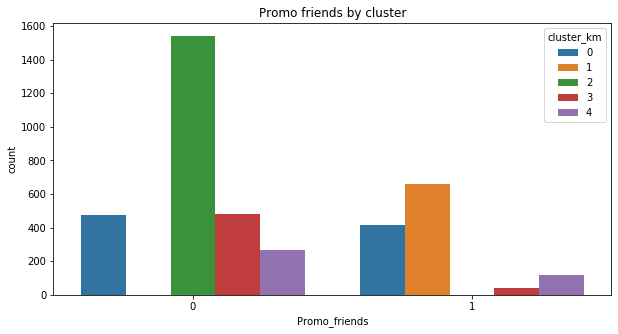

In [58]:
plt.figure(figsize=(10, 5))
plt.title('Promo friends by cluster')
sns.countplot(x="Promo_friends", hue="cluster_km", data=data)
plt.show() 


Clusters 0 and 1 use more promo friends then another.
Cluster 2 don't use more promo friends.


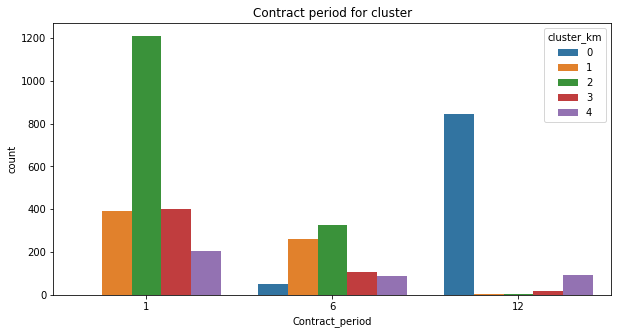

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Contract period for cluster')
sns.countplot(x="Contract_period", hue="cluster_km", data=data)
plt.show() 


Cluster 1, 2 and 3 have the lowest contract period.
Cluster 0 have the longest contract period.


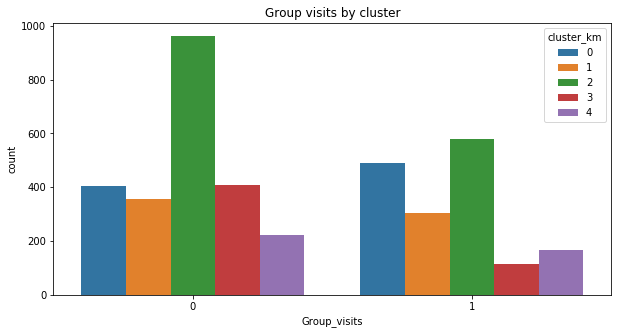

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Group visits by cluster')
sns.countplot(x="Group_visits", hue="cluster_km", data=data)
plt.show() 

Clusters 2 have the less group visits.

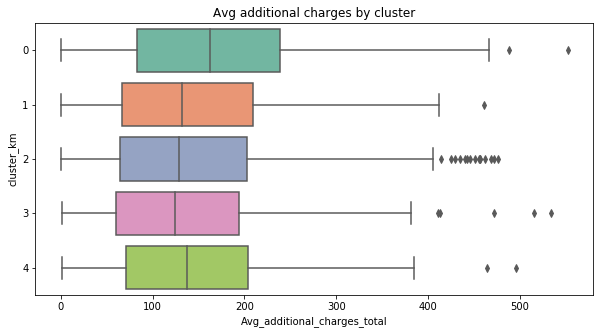

In [54]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=data,x ="Avg_additional_charges_total", orient="h", y="cluster_km", palette="Set2")
plt.title('Avg additional charges by cluster')
plt.show() 

People from cluster 0  make more additional charges.

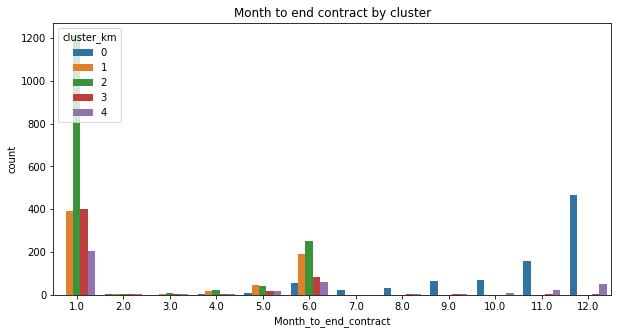

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Month to end contract by cluster')
sns.countplot(x="Month_to_end_contract", hue="cluster_km", data=data)
plt.show() 


Cluster 0 have the biggest number of people with longtern contracts.
People in clusters 1, 2 and 3 have a lowtern contracts.

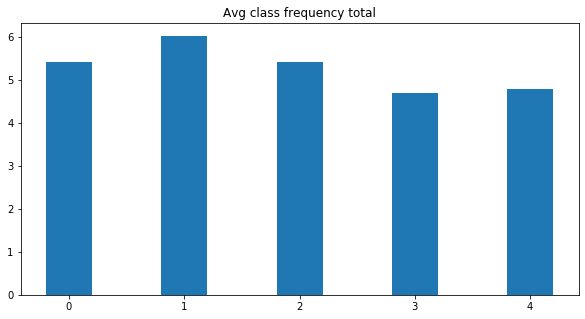

In [66]:

plt.figure(figsize=(10, 5))
plt.bar('cluster_km', 'Avg_class_frequency_total', data=data, width = 0.4)
plt.title('Avg class frequency total')
plt.show() 

People from group 1 have geatest average frequency of visits per week over the customer's lifetime.

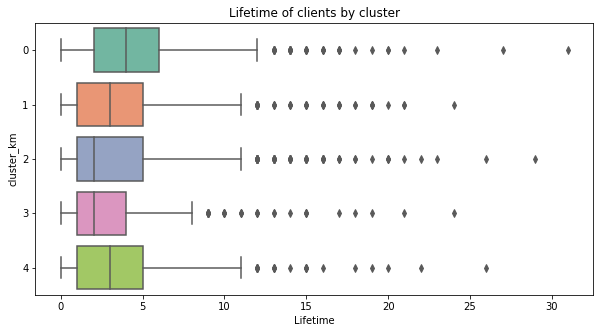

In [55]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=data,x ="Lifetime", orient="h", y="cluster_km", palette="Set2")
plt.title('Lifetime of clients by cluster')
plt.show() 




People from cluster 0 have more Lifetime.

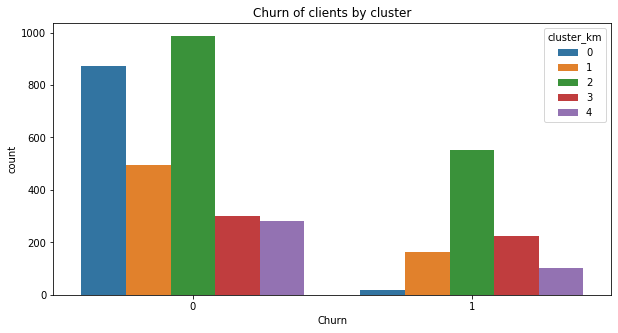

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Churn of clients by cluster')
sns.countplot(x="Churn", hue="cluster_km", data=data)
plt.show() 




People from clusters 0 and 4 have a lowest count of Churn.

In [55]:
data.groupby(['cluster_km'])['Churn'].value_counts(normalize = True)

cluster_km  Churn
0           0        0.972305
            1        0.027695
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931900
            1        0.068100
Name: Churn, dtype: float64

### Conlusion:


- Model Random Forest Classifier makes more accurate predictions than Logistic Regression.
- Optimal number of clusters (5) corresponds to the five different colors on the plot.
    
  Conclusions about clusters :
- people from clusters 0 have more partner than other;
- people from clusters 2 have less partner than other.
- people from cluster 0  make more additional charges.
- 79% of people from cluster 2 used Promo friends;
- cluster 2 don't use more promo friends.
- cluster 1, 2 and 3 have the lowest contract period.
- cluster 0 have the longest contract period.
- people from cluster 2 less using group visits;
- people from cluster 4 more spending time in a gym;
- cluster 0 have greatest lifetime.
- clusters 0 and 4 have less customer churn.
- all clusters do not differ in age.
- all clusters do not differ in gender.
- cluster 3 is not near the gym.
- cluster 1 has the most convenient location relative to the gym.
- in clusters 0, 2 we see low churn of people.

# General conclusion and Recommendation :<a name="introduction3"></a>


## Conclusion
In our data we have:
- the same number of people of both genders;
- the mean age of people is 29;
- the mean contract period about 4.5 month;
- the mean life time of users about 3.7 month.

People who don't have churn: 
- are twice as likely to participate in group classes;
- more often spent money on other gym services;
- have more monthes remaining until the contract expires (it shows people's confidence in future visits to the gym);
- have more visits per week over the preceding month.

People who have churn:
- less likely to use the partner;
- more likely to use the promo friends.
- have a small contract period.

People who churn on average yunger than People who not churn.

We have a great correlation between:
- Promo_friends and Partner - people who have patrner with gym come through promo;
- Partner and Contract_period - people who have patrner have the same contract period.


Conclusions about clusters :
- people from clusters 0 have more partner than other;
- people from clusters 2 have less partner than other.
- people from cluster 0  make more additional charges.
- 79% of people from cluster 2 used Promo friends;
- cluster 2 don't use more promo friends.
- cluster 1, 2 and 3 have the lowest contract period.
- cluster 0 have the longest contract period.
- people from cluster 2 less using group visits;
- people from cluster 4 more spending time in a gym;
- cluster 0 have greatest lifetime.
- clusters 0 and 4 have less customer churn.
- all clusters do not differ in age.
- all clusters do not differ in gender.
- cluster 3 is not near the gym.
- cluster 1 has the most convenient location relative to the gym.

## Recommendation

I recommend to make more client for clusters 0 and 4:
- more partner programs;
- more group activities;
- the 
and propose for this people more longtern subscription

For less churn - to open new gyms near place of living of people from cluster 2;
Promo friend not so Effective that suppost to be.